<a href="https://colab.research.google.com/github/Taeseong-eom/FOM-MiniProject/blob/master/mini1/%EC%99%80%EC%9D%B8%ED%92%88%EC%A7%88%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns # 시각화를 위한 라이브러

# **1. 데이터 로딩**


In [2]:
train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인train.csv') # train 데이터 가져옴
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인test.csv') # test 데이터 가져옴

## **2. 데이터 탐색 및 전처리**

In [3]:
train.isnull().sum() # 결측치 없음

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [4]:
train.info() # 간단한 데이터 확인
# type 데이터가 Object로 되어있다. (red, white)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [5]:
train.describe() # 데이터의 간단한 통계 확인

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


# **3. 데이터 변환**
모델에게 데이터를 잘 이해시키기 위해 정규화, 표준화, 인코딩 작업을 해보자

object 형태인 type을 데이터 처리를 위해 인코딩하겠음.

인코딩이란?
컴퓨터가 이해할 수 있도록 범주형데이터(남성,여성)를 수치형데이터(0, 1)로 바꾸는 작업을 의미

인코딩방법은 여러가지가 있음 -> 상황에 맞게 사용해야함
# 인코딩 종류
1. 레이블 인코딩 : 제일 간단함 그냥 각 클래스를 1, 2, 3 이런식으로 이름 지정 -> 숫자가 달라서 이상한 결과 나올 수 있음
2. 원-핫 인코딩 : 빨강, 파랑을 [0,1],[1,0] 이런식으로 표현 -> 특성이 너무 많으면 차원 수가 너무 많아질 수 있음
3. 이진 인코딩 : 범주를 이진수로 표현함 -> 원-핫 인코딩의 차원 문제를 해결
4. 임베딩 : 저차원의 벡터데이터로 바꿔서 데이터간 의미를 찾을 수 있음 -> NLP(자연어 처리)에서 활용

그럼 red, white가 품질에 영향을 미치는지 알아보자 -> 그래야 인코딩 방법을 선택하지

In [6]:
# type 열을 기준으로 데이터를 그룹화
grouped_data = train.groupby("type")

# 각 타입별로 품질의 평균을 계산
red_wine_quality = grouped_data["quality"].mean()["red"]
white_wine_quality = grouped_data["quality"].mean()["white"]

# 각 평균 출력
print(red_wine_quality)
print(white_wine_quality)

5.6375186846038865
5.877374368838663


red 평균과 white 평균 차이가 없네?
라벨 인코딩은 순서나 중요도를 부여할 위험이 있으니 원-핫 인코딩을 하겠음

In [7]:
train = pd.get_dummies(train, columns=['type']) # type을 원-핫 인코딩

In [8]:
train.info()# 원-핫 인코딩이 잘 됐는지 확인해보자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type_red              5497 non-null   uint8  
 14  type_white            5497 non-null   uint8  
dtypes: float64(11), int64

type이 type_red, white(unit8)로 원-핫 인코딩 되었다

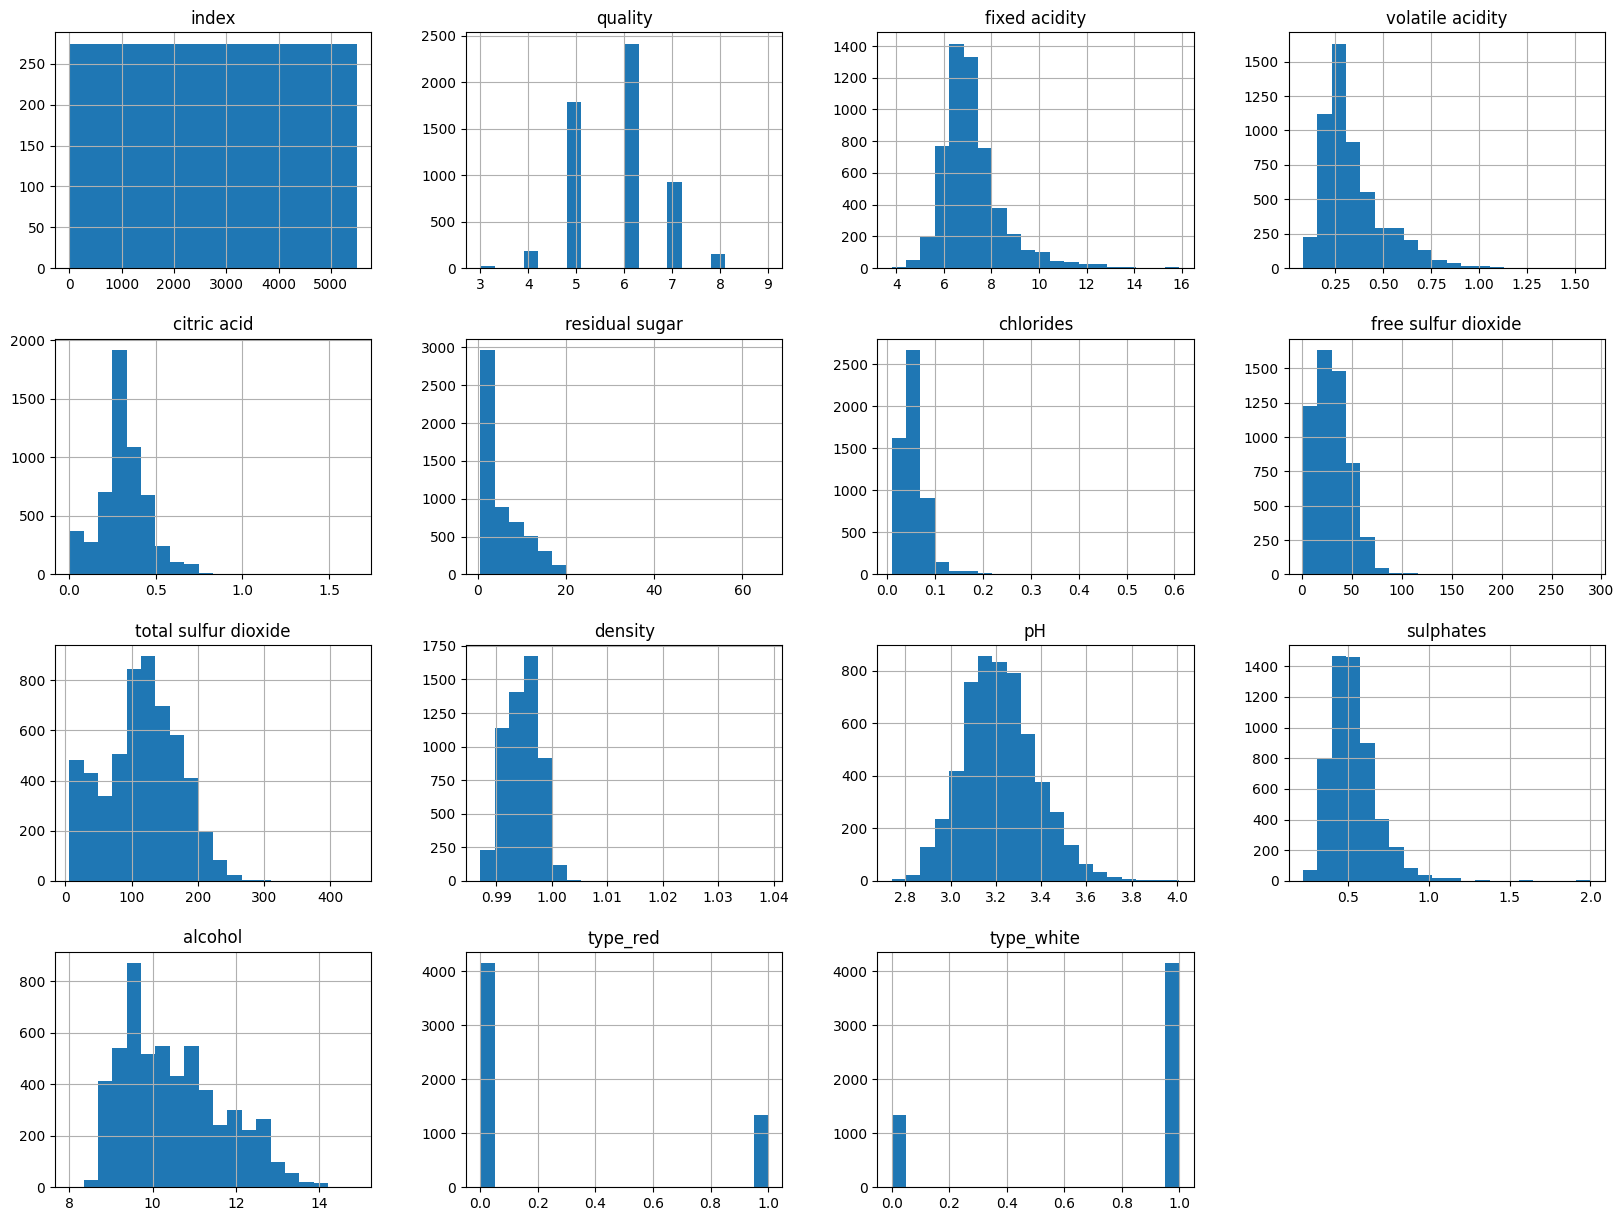

In [9]:
# 데이터의 전반적인 분포를 확인해보자
train.hist(bins=20, figsize=(20,15))
plt.show()

이상적인 모양이 아닌 몰려있는 데이터들이 있다 -> '왜곡'되었다.
분포를 조정하기 위해 변환을 하겠다.
변환 방법에는 여러가지가 있다.
# 로그 변환 종류
1. 로그 변환 : 데이터에 로그를 적용하여 큰 값을 압축(눌러서) -> 오른쪽으로 긴꼬리 데이터에 적합

2. 제곱근 변환 : 제곱근을 적용(로그 변환과 유사한 효과) -> 로그 보단 약함

3. 박스-콕스 변환 : 일반적인 방법. 단, 양수 데이터에만 적용할 수 있다.파라미터(람다)로 변환 정도 조절.

4. Yeo-Johnson 변환 : 박스-콕스 변환과 유사. 하지만, 음수 값을 포함한 데이터에도 적용 가능

제곱근을 제외한 모든 변환을 적용해보자

In [10]:
# from scipy import stats

# # 'index', 'type_red', 'type_white' 열을 제외한 모든 열에 대해 박스-콕스 변환을 적용합니다.
# # 박스-콕스 변환을 적용할 수 없는 경우에는 Yeo-Johnson 변환을 적용합니다.

# # 변환을 적용할 열 선택
# columns_to_transform = train.columns.drop(['index', 'type_red', 'type_white', 'quality'])

# for col in columns_to_transform:
#     # 모든 값이 양수인지 확인합니다. 박스-콕스 변환은 양수 값에만 적용 가능합니다.
#     if np.all(train[col] > 0):
#         # 박스-콕스 변환 적용
#         transformed_data, _ = stats.boxcox(train[col])
#         train[col + '_boxcox'] = transformed_data
#     else:
#         # Yeo-Johnson 변환 적용
#         transformed_data, _ = stats.yeojohnson(train[col])
#         train[col + '_yeojohnson'] = transformed_data

In [11]:
# # 로그 변환을 적용할 열 목록
# columns_to_transform = [
#     'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
#     'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
#     'density', 'pH', 'sulphates', 'alcohol'
# ]

# # 선택된 열에 대해 로그 변환 적용
# for col in columns_to_transform:
#     # 데이터에 1을 더하고 로그 변환 적용
#     train[col + '_log'] = np.log1p(train[col])

In [12]:
# train.hist(bins=20, figsize=(20,15))
# plt.show()

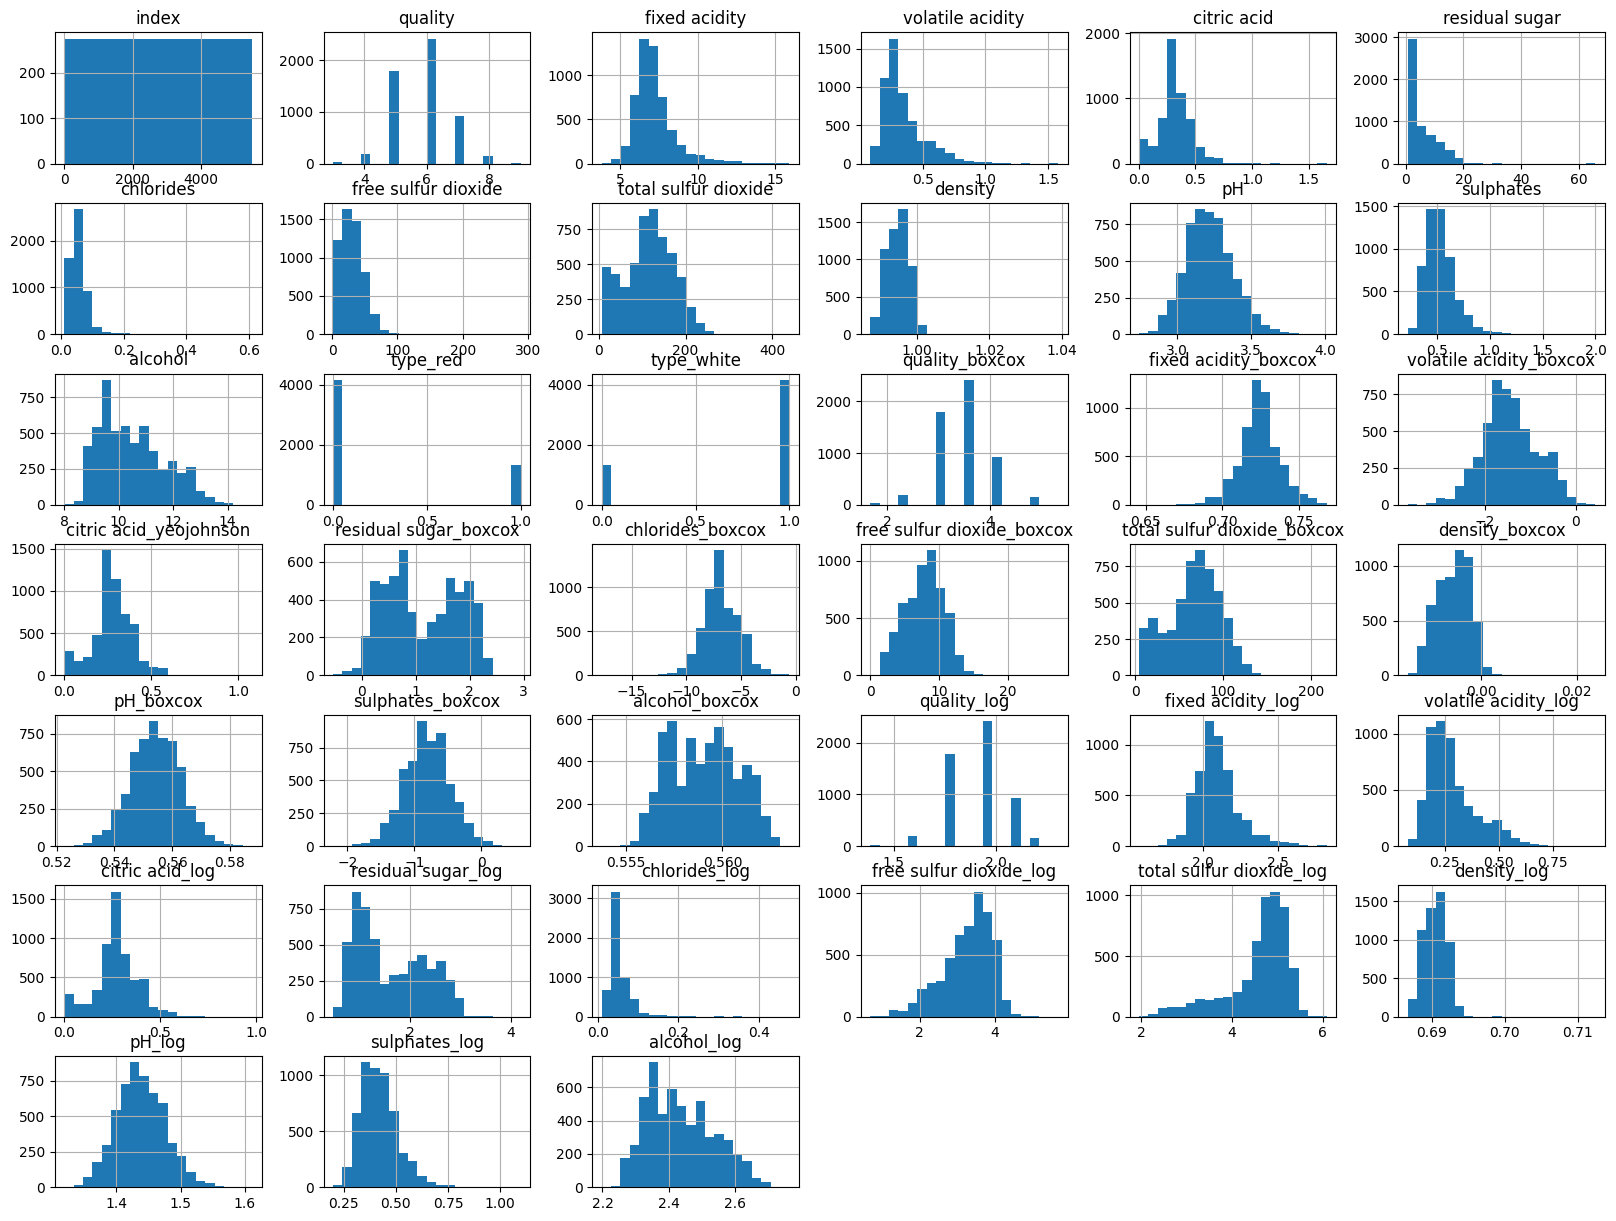

# 변환 그래프 비교
박스-콕스와 Yeo-Johnson 변환 : fixed acidity, volatile acidity, residual sugar, chlorides, density

log 변환 : citric acid, free sulfur dioxide, total sulfur dioxide, pH, sulphates, alcohol

각각 변환이 잘 된 것들을 정리했다.
변환을 다 다르게 해서 사용해야겠다.

In [13]:
from scipy import stats

# 박스-콕스 변환 및 Yeo-Johnson 변환을 적용할 열
boxcox_yeojohnson_columns = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'density']
# 로그 변환을 적용할 열
log_transform_columns = ['citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

# 박스-콕스 변환 및 Yeo-Johnson 변환 적용
for col in boxcox_yeojohnson_columns:
    # 모든 값이 양수인지 확인합니다. 박스-콕스 변환은 양수 값에만 적용 가능합니다.
    if np.all(train[col] > 0):
        # 박스-콕스 변환 적용
        transformed_data, _ = stats.boxcox(train[col])
        train[col + '_boxcox'] = transformed_data
    else:
        # Yeo-Johnson 변환 적용
        transformed_data, _ = stats.yeojohnson(train[col])
        train[col + '_yeojohnson'] = transformed_data

# 로그 변환 적용
for col in log_transform_columns:
    # 로그 변환 적용 (데이터에 1을 더하고 로그 변환 적용)
    train[col + '_log'] = np.log1p(train[col])

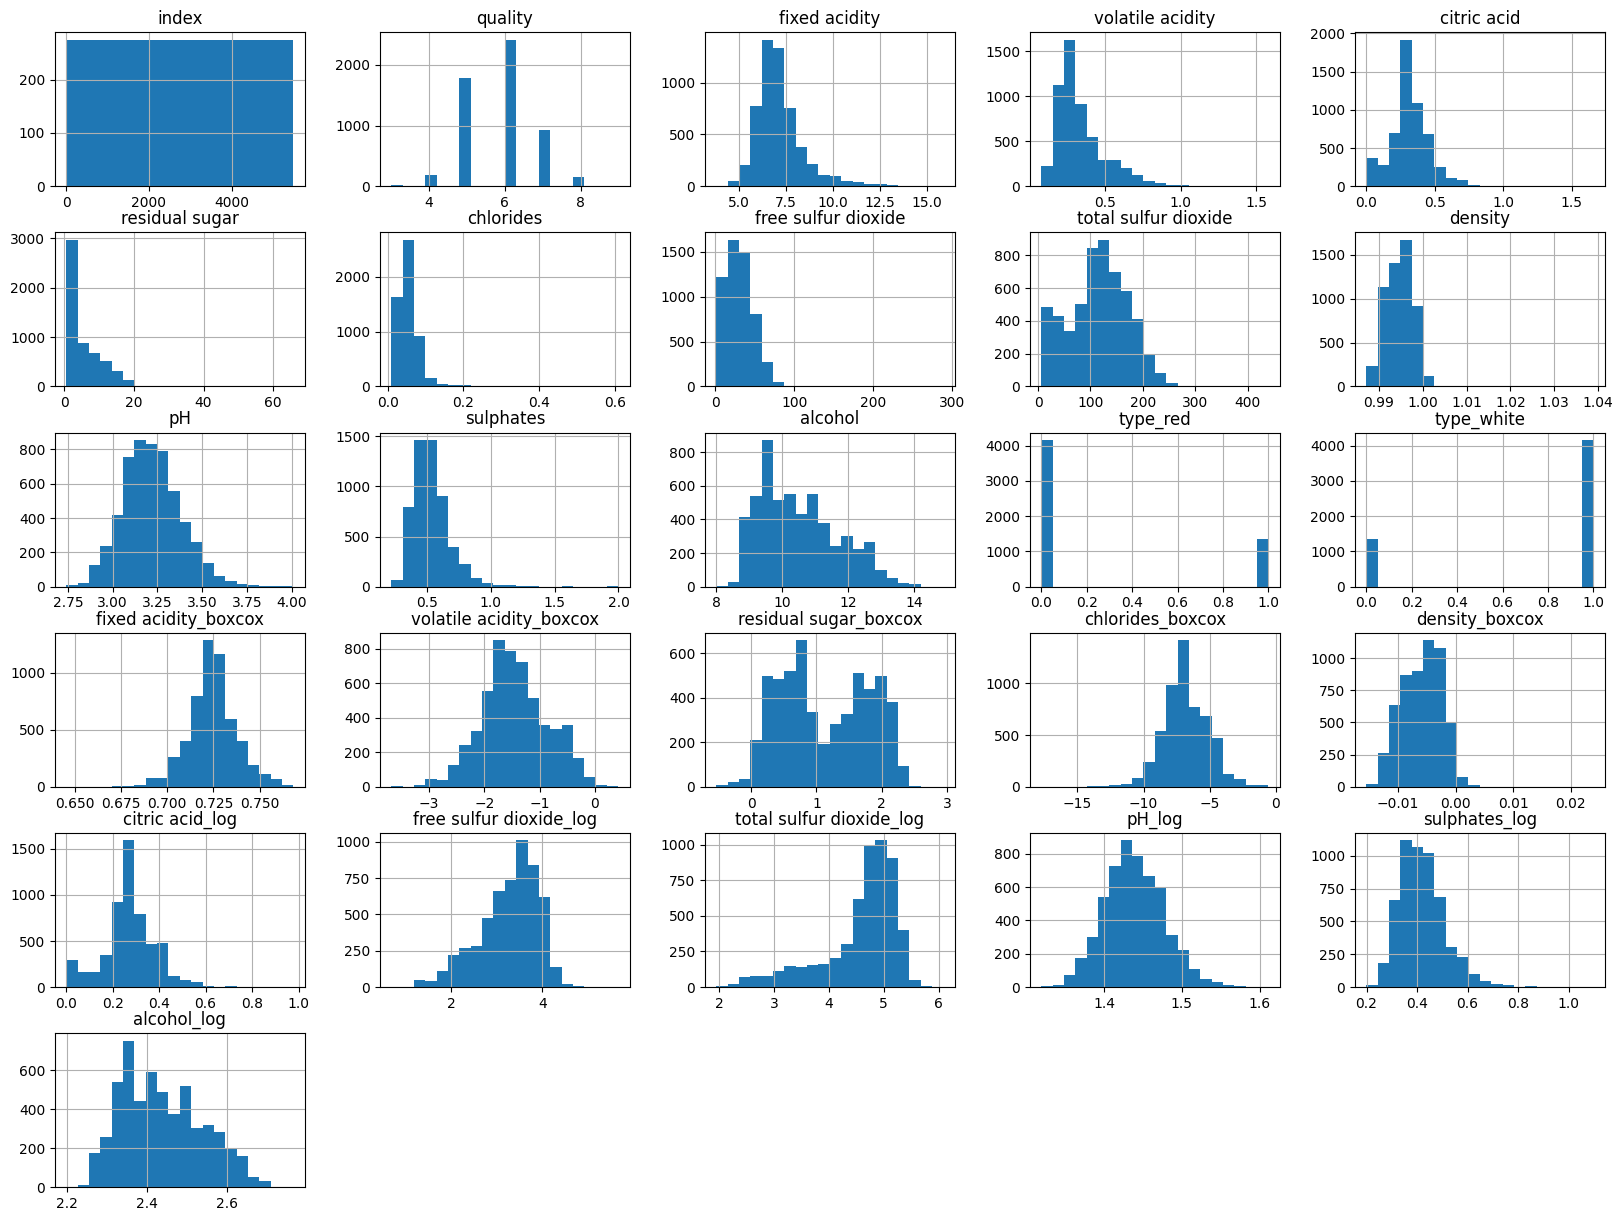

In [14]:
train.hist(bins=20, figsize=(20,15))
plt.show()

그럼 기존의 train에 있던 칼럼을 제거 해보자.

In [15]:
columns_to_drop = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'density', 'pH', 'sulphates', 'alcohol', 'index']

# 컬럼 삭제
train = train.drop(columns=columns_to_drop, axis=1)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   quality                   5497 non-null   int64  
 1   type_red                  5497 non-null   uint8  
 2   type_white                5497 non-null   uint8  
 3   fixed acidity_boxcox      5497 non-null   float64
 4   volatile acidity_boxcox   5497 non-null   float64
 5   residual sugar_boxcox     5497 non-null   float64
 6   chlorides_boxcox          5497 non-null   float64
 7   density_boxcox            5497 non-null   float64
 8   citric acid_log           5497 non-null   float64
 9   free sulfur dioxide_log   5497 non-null   float64
 10  total sulfur dioxide_log  5497 non-null   float64
 11  pH_log                    5497 non-null   float64
 12  sulphates_log             5497 non-null   float64
 13  alcohol_log               5497 non-null   float64
dtypes: float

잘 제거된 것을 확인할 수 있다.

# **4. 상관관계 분석**
특성 간 상관관계를 분석해보자.
'index', 'type_red', 'type_white' 이 것들은 분석할 필요 없으니 빼겠다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

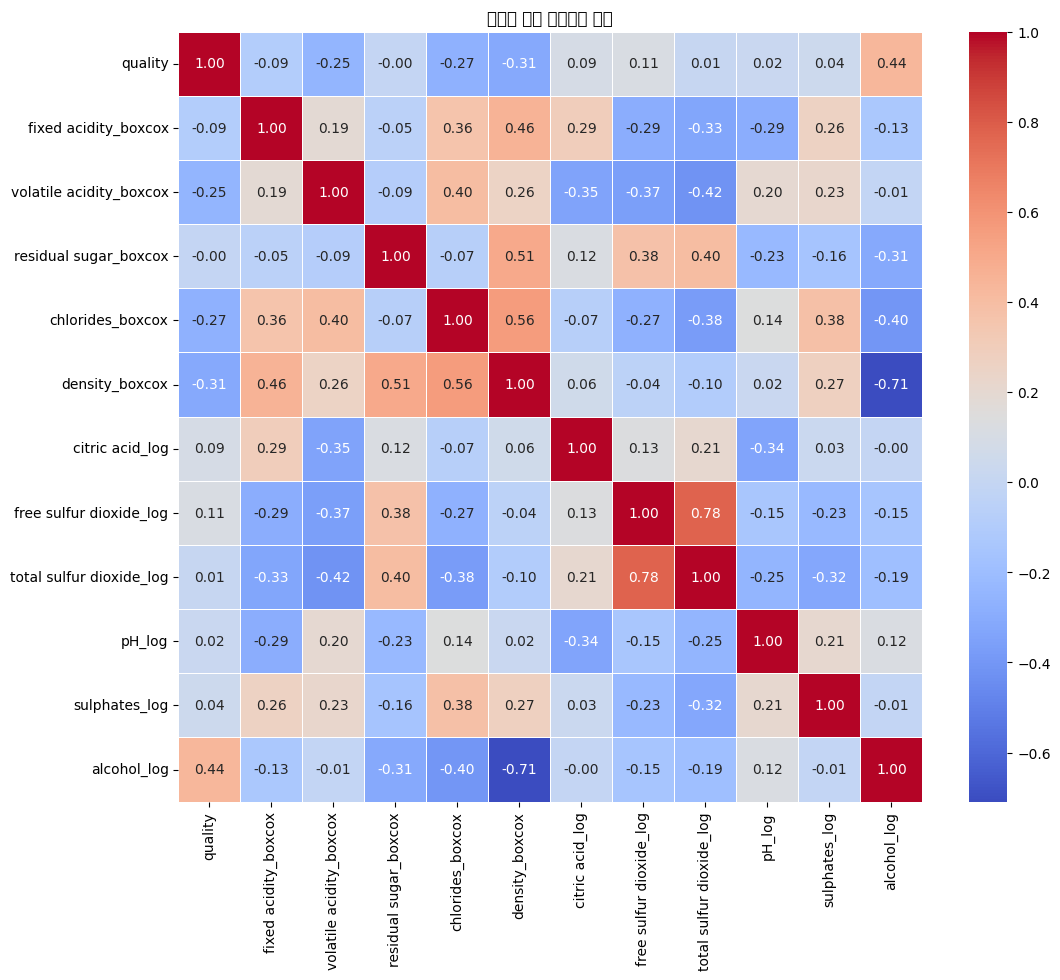

In [18]:
# 상관관계 분석에서 제외할 컬럼 목록
exclude_columns = ['type_red', 'type_white']

# 제외할 컬럼들을 제거하고 상관관계 행렬 계산
correlation_matrix = train.drop(columns=exclude_columns).corr()

# 상관관계 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('변수들 간의 상관관계 행렬')
plt.show()

**상관관계별 구분**

매우 약한 상관관계: 0.0에서 ±0.19 사이

약한 상관관계: ±0.20에서 ±0.39 사이

중간 상관관계: ±0.40에서 ±0.59 사이

강한 상관관계: ±0.60에서 ±0.79 사이

매우 강한 상관관계: ±0.80에서 ±1.0 사이

alcohol_log : 0.44, density_boxcox : -0.31, chlorides_boxcox : -0.27, volatile acidity_boxcox : -0.25
으로 나왔다.

나머지는 매우 약한 상관관계이니 제외하겠다.

In [19]:
selected_features = ['quality', 'alcohol_log', 'density_boxcox', 'chlorides_boxcox', 'volatile acidity_boxcox'] # 얘네만 남길 거임.
train = train[selected_features]

In [20]:
train

,quality,alcohol_log,density_boxcox,chlorides_boxcox,volatile acidity_boxcox
0,5,2.415914,-0.006154,-7.416179,-0.383192
1,5,2.351375,-0.003238,-5.516065,-0.530457
2,5,2.476538,-0.009262,-6.126391,-1.961162
3,6,2.468100,-0.006648,-7.012117,-1.961162
4,6,2.476538,-0.004794,-5.992199,-1.045759
...,...,...,...,...,...
5492,5,2.406945,-0.007486,-9.254896,-2.509621
5493,6,2.484907,-0.010564,-8.425270,-2.205973
5494,7,2.509599,-0.010280,-8.280748,-2.509621
5495,5,2.442347,-0.009024,-7.416179,-1.013885


필요없는 데이터가 잘 없어졌다.

# 품질 상관관계를 분석했으니 품질을 원-핫 인코딩하여 분류 모델에 대비하겠음.

그리고 quality 가 3 ~ 9 로 나눠져 있기 때문에 원-핫 인코딩 하겠음

In [21]:
quality_dummies = pd.get_dummies(train['quality'], prefix='quality')

# 원-핫 인코딩된 열을 기존 데이터프레임에 병합하기 전에, 원래 'quality' 열을 제거
train.drop('quality', axis=1, inplace=True)

# 원-핫 인코딩된 데이터프레임을 원래의 데이터프레임과 합치기
train = pd.concat([train, quality_dummies], axis=1)

그럼 이제 데이터 분할을 해보자.
#**5. 데이터 분할**
train 데이터를 train과 validation 으로 나누어야 한다.

왜?   
과적합과 성능을 검증하기 위해서

In [22]:
from sklearn.model_selection import train_test_split # 데이터를 분할하기 위한 라이브러리

X = train.drop(['quality_3', 'quality_4', 'quality_5', 'quality_7', 'quality_8', 'quality_9'], axis=1)  # 원-핫 인코딩된 quality 열 제외
Y = train[['quality_3', 'quality_4', 'quality_5', 'quality_7', 'quality_8', 'quality_9']]  # 원-핫 인코딩된 quality 열만 포함


# 데이터를 훈련 세트와 테스트 세트로 분할
# test_size=0.2 : 데이터의 20%를 테스트 세트로 설정
# random_state는 같은 결과를 얻기 위해 seed를 42로 설정(난수 생성 시작점)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# **6. 모델링 및 평가: 데이터를 분할한 후, 훈련 세트를 사용하여 모델을 학습시키고, 검증 세트나 테스트 세트를 사용하여 모델의 성능을 평가합니다. 필요에 따라 모델의 하이퍼파라미터를 조정하며 성능을 개선합니다.**

In [23]:
X_train

,alcohol_log,density_boxcox,chlorides_boxcox,volatile acidity_boxcox,quality_6
2845,2.442347,-0.008712,-7.416179,-1.531832,1
957,2.517696,-0.011098,-7.309978,-2.037497,1
2569,2.564949,-0.010954,-6.829022,-2.037497,1
4449,2.667228,-0.012064,-7.640222,-1.301833,0
5449,2.541602,-0.010409,-8.576211,-1.013885,1
...,...,...,...,...,...
3772,2.251292,0.000378,-6.341271,-2.205973,1
5191,2.379546,-0.006743,-7.309978,-1.433952,0
5226,2.561096,-0.007149,-6.656862,-0.458081,0
5390,2.282382,-0.001667,-6.919131,-2.037497,1


# **6. 모델링 및 평가**

# 데이터 스케일링
데이터 값을 작게 하고 특성들 간에 차이를 조정하여 모델 성능을 올린다

스케일링 방법
1. 표준화 (Standardization) : 각 특성의 평균을 0으로, 분산을 1로 조정하여 데이터가 정규 분포를 따르지 않을 때도 잘 작동하며, 이상치에 대한 영향을 줄일 수 있다. ->  선형 모델, 로지스틱 회귀, 서포트 벡터 머신, 신경망 등 다양한 곳에서 사용

2. 최소-최대 정규화 (Min-Max Scaling) : 최소값을 0, 최대값을 1로 조정하여 모든 특성 값이 정확히 같은 스케일을 갖게한다. 단, 이상치가 있으면 다른 데이터가 좁은 범위에 압축될 수 있다. -> 이상치가 적은 데이터에 사용

3. 로버스트 스케일링 (Robust Scaling) : 이상치가 많은 데이터에 사용

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 표준화를 사용하겠음

X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# 분류 모델
분류 모델의 종류로는

1. 의사결정트리 :

2. 랜덤포레스트 :

둘 다 해보고 더 좋은 것을 쓰자.


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 모델 생성
model = RandomForestClassifier(random_state=42)

# 모델 훈련
model.fit(X_train, Y_train)
# 훈련 세트에서의 예측
Y_train_pred = model.predict(X_train)

# 훈련 세트에서의 정확도 및 분류 리포트
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"훈련 세트 정확도: {train_accuracy}")
print("훈련 세트 분류 리포트:")
print(classification_report(Y_train, Y_train_pred))
# 검증 세트에서의 예측
Y_validation_pred = model.predict(X_validation)

# 검증 세트에서의 정확도 및 분류 리포트
validation_accuracy = accuracy_score(Y_validation, Y_validation_pred)
print(f"검증 세트 정확도: {validation_accuracy}")
print("검증 세트 분류 리포트:")
print(classification_report(Y_validation, Y_validation_pred))


훈련 세트 정확도: 1.0
훈련 세트 분류 리포트:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00      1437
           3       1.00      1.00      1.00       741
           4       1.00      1.00      1.00       118
           5       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00      2474
   macro avg       1.00      1.00      1.00      2474
weighted avg       1.00      1.00      1.00      2474
 samples avg       0.56      0.56      0.56      2474

검증 세트 정확도: 0.87
검증 세트 분류 리포트:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      0.11      0.19        35
           2       0.87      0.88      0.87       351
           3       0.78      0.76      0.77       183
           4       0.86      0.35      0.50        34
           5       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 준비
# X_train, Y_train, X_validation, Y_validation을 준비해야 합니다.
# 이 예시에서는 이 변수들이 이미 준비되어 있다고 가정합니다.

# 모델 생성
model = DecisionTreeClassifier(random_state=42)

# 모델 훈련
model.fit(X_train, Y_train)

# 훈련 세트에서의 예측
Y_train_pred = model.predict(X_train)

# 훈련 세트에서의 정확도 및 분류 리포트
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"훈련 세트 정확도: {train_accuracy}")
print("훈련 세트 분류 리포트:")
print(classification_report(Y_train, Y_train_pred))

# 검증 세트에서의 예측
Y_validation_pred = model.predict(X_validation)

# 검증 세트에서의 정확도 및 분류 리포트
validation_accuracy = accuracy_score(Y_validation, Y_validation_pred)
print(f"검증 세트 정확도: {validation_accuracy}")
print("검증 세트 분류 리포트:")
print(classification_report(Y_validation, Y_validation_pred))


훈련 세트 정확도: 1.0
훈련 세트 분류 리포트:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00      1437
           3       1.00      1.00      1.00       741
           4       1.00      1.00      1.00       118
           5       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00      2474
   macro avg       1.00      1.00      1.00      2474
weighted avg       1.00      1.00      1.00      2474
 samples avg       0.56      0.56      0.56      2474

검증 세트 정확도: 0.8363636363636363
검증 세트 분류 리포트:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.11      0.14      0.12        35
           2       0.83      0.78      0.81       351
           3       0.71      0.73      0.72       183
           4       0.38      0.44      0.41        34
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# **7. 결과 해석 및 보고**

아래는 신경망을 구성해서 해보려 했지만 ... 이상하게 정확도가 40%대에 머물러서 실패 뭐가 문제인지 모르겠다..

간단한 모델이니 sklearn을 쓰니 편하게 결과가 나왔다.

추가적으로 XGBoost : 분류, 회귀, 랭킹 문제에 널리 사용
도 사용 해봐야겠다.


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # 모델 구성
# model = Sequential([ # tanh은 -1 ~ 1 사이값을 출력해서 데이터가 가운데 몰려 있을 때 좋다. 그리고 비선형함수라서 복잡한 문제를 해결해준다. 또한 그레디언트 소실 문제를 해결해준다. 그레디언트 소실 문제 : 여러 신경망을 거쳐가면서 기울기가 0에 가까워진다.
#   tf.keras.layers.Dense(64, activation='tanh', kernel_initializer='glorot_uniform'),
#   tf.keras.layers.Dense(128, activation='tanh'),
#   tf.keras.layers.Dense(6, activation='softmax')  # 이진 분류 문제의 경우 'sigmoid', 다중 분류는 'softmax' 사용
# ])

# # 모델 컴파일
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',  # 이진 분류 문제의 경우 'binary_crossentropy', 다중 분류는 'categorical_crossentropy' 사용
#               metrics=['accuracy'])


# # 모델 훈련
# # EarlyStopping 콜백을 사용하여 모델이 더 이상 개선되지 않을 때 훈련을 조기에 중단하겠음
# # 체크포인트로 성능이 가장 좋은 순간 저장
# early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# history = model.fit(X_train, Y_train, epochs=1000, validation_data=(X_validation, Y_validation)) # , callbacks=[early_stopping]

# # 모델 평가
# val_loss, val_accuracy = model.evaluate(X_validation, Y_validation)
# print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# # 훈련 과정 시각화
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.tight_layout()
# plt.show()